In [2]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Conv1D, BatchNormalization, MaxPooling2D,Dropout, GRU
from tensorflow.keras.models import Model, save_model, load_model, Sequential
from tensorflow.keras.utils import plot_model


##TASK 1

###TASK 1.1

In [ ]:
data1 = pd.read_csv('/content/daily-minimum-temperatures-in-me.csv')
data1

,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8
...,...,...
3645,12/27/1990,14
3646,12/28/1990,13.6
3647,12/29/1990,13.5
3648,12/30/1990,15.7


In [ ]:
data1.isnull().sum()

Date                          0
Daily minimum temperatures    0
dtype: int64

In [ ]:
def new_feature_dataset(ip_data, prev_data_count=2):
    new_data=[]
    n=ip_data.shape[0]
    i_range = n - prev_data_count - 1
    
    for i in range(0, i_range):
        new_data.append(ip_data[i:(i+prev_data_count+1)]) 
        #Add the records upto the previous count value as features and current record as target
    return np.array(new_data)

**Here, considering 6 previous records as appropriate no of features for prediction of single current record as target.**

In [ ]:
prev_data_count=4
#no of previous occuring recors to be used as features 
new_task1_data = new_feature_dataset(data1['Daily minimum temperatures'],prev_data_count)

In [ ]:
col_names=['feature_'+str(i+1) for i in range(0,prev_data_count)]
col_names.append('Target')
print(col_names)

['feature_1', 'feature_2', 'feature_3', 'feature_4', 'Target']


In [ ]:
new_task1_data=pd.DataFrame(new_task1_data,columns=col_names)
new_task1_data.head()

,feature_1,feature_2,feature_3,feature_4,Target
0,20.7,17.9,18.8,14.6,15.8
1,17.9,18.8,14.6,15.8,15.8
2,18.8,14.6,15.8,15.8,15.8
3,14.6,15.8,15.8,15.8,17.4
4,15.8,15.8,15.8,17.4,21.8


In [ ]:
new_task1_data.dtypes

feature_1    object
feature_2    object
feature_3    object
feature_4    object
Target       object
dtype: object

In [ ]:
for i in new_task1_data.columns:
  new_task1_data[i]=pd.to_numeric(new_task1_data[i], errors='coerce')

In [ ]:
new_task1_data.dtypes

feature_1    float64
feature_2    float64
feature_3    float64
feature_4    float64
Target       float64
dtype: object

In [ ]:
new_task1_data=new_task1_data.fillna(0)

In [ ]:
X = new_task1_data.drop('Target',axis=1)
y = new_task1_data['Target']


####Splitting the data in 80:20 ratio for training and testing of the model.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
X_train.head()

,feature_1,feature_2,feature_3,feature_4
514,11.5,7.0,7.1,9.0
1962,10.9,12.0,12.1,10.4
3010,13.3,15.1,14.2,14.2
221,5.2,3.0,5.6,7.9
3416,12.3,11.1,10.2,9.5


####Normalizing data

In [ ]:
X_train=(X_train-X_train.mean())/X_train.std()
X_test = (X_test-X_train.mean())/X_train.std()
y_train=(y_train-y_train.mean())/y_train.std()
y_test = (y_test-y_train.mean())/y_train.std()


####LSTM

In [ ]:
inp = Input(shape=[None,1])
x = Conv1D(filters=64, kernel_size=5,strides=1, padding="causal",activation="relu")(inp)
x = LSTM(64, return_sequences=True)(x)
x = LSTM(64, return_sequences=True)(x)
x = Dense(40, activation="relu")(x)
x = Dropout(0.2)(x)
out = Dense(1, activation='linear')(x)

model = Model(inputs=inp,outputs=out)
model.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, None, 1)]         0         
                                                                 
 conv1d_15 (Conv1D)          (None, None, 64)          384       
                                                                 
 lstm_30 (LSTM)              (None, None, 64)          33024     
                                                                 
 lstm_31 (LSTM)              (None, None, 64)          33024     
                                                                 
 dense_30 (Dense)            (None, None, 40)          2600      
                                                                 
 dropout_2 (Dropout)         (None, None, 40)          0         
                                                                 
 dense_31 (Dense)            (None, None, 1)           41 

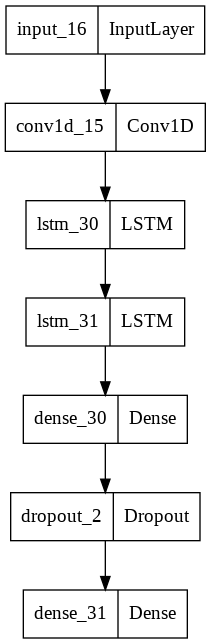

In [ ]:
plot_model(model,'model1_lstm.png')

**Training**

In [ ]:
model.compile(optimizer='adam',loss='mse')

In [ ]:
h1=model.fit(X_train,y_train.values,epochs=15,validation_split=0.1)

Epoch 1/15
82/82 [==============================] - 4s 24ms/step - loss: 1.0094 - val_loss: 0.9140
Epoch 2/15
82/82 [==============================] - 1s 9ms/step - loss: 1.0091 - val_loss: 0.9138
Epoch 3/15
82/82 [==============================] - 1s 10ms/step - loss: 1.0092 - val_loss: 0.9139
Epoch 4/15
82/82 [==============================] - 1s 9ms/step - loss: 1.0091 - val_loss: 0.9138
Epoch 5/15
82/82 [==============================] - 1s 10ms/step - loss: 1.0092 - val_loss: 0.9138
Epoch 6/15
82/82 [==============================] - 1s 10ms/step - loss: 1.0093 - val_loss: 0.9139
Epoch 7/15
82/82 [==============================] - 1s 10ms/step - loss: 1.0093 - val_loss: 0.9139
Epoch 8/15
82/82 [==============================] - 1s 9ms/step - loss: 1.0092 - val_loss: 0.9139
Epoch 9/15
82/82 [==============================] - 1s 9ms/step - loss: 1.0091 - val_loss: 0.9139
Epoch 10/15
82/82 [==============================] - 1s 9ms/step - loss: 1.0090 - val_loss: 0.9138
Epoch 11/15
82

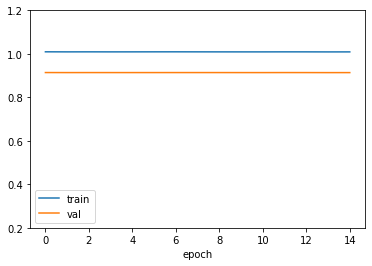

In [ ]:
plt.plot(h1.history['loss'])
plt.plot(h1.history['val_loss'])
plt.ylim(0.2,1.2)
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower left')
plt.show()

####GRU

In [ ]:
inp = Input(shape=[None,1])
x = Conv1D(filters=64, kernel_size=5,strides=1, padding="causal",activation="relu")(inp)
x = GRU(64, return_sequences=True)(x)
x = Dense(20, activation="relu")(x)
out = Dense(1, activation='linear')(x)

model = Model(inputs=inp,outputs=out)
model.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, None, 1)]         0         
                                                                 
 conv1d_17 (Conv1D)          (None, None, 64)          384       
                                                                 
 gru_2 (GRU)                 (None, None, 64)          24960     
                                                                 
 dense_34 (Dense)            (None, None, 20)          1300      
                                                                 
 dense_35 (Dense)            (None, None, 1)           21        
                                                                 
Total params: 26,665
Trainable params: 26,665
Non-trainable params: 0
_________________________________________________________________


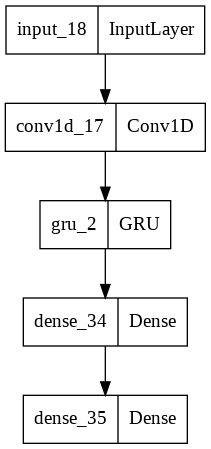

In [ ]:
plot_model(model,'model1_gru.png')

**Training**

In [ ]:
model.compile(optimizer='adam',loss='mse')

In [ ]:
h1=model.fit(X_train,y_train.values,epochs=15,validation_split=0.1)

Epoch 1/15
82/82 [==============================] - 3s 13ms/step - loss: 1.0115 - val_loss: 0.9139
Epoch 2/15
82/82 [==============================] - 1s 7ms/step - loss: 1.0099 - val_loss: 0.9143
Epoch 3/15
82/82 [==============================] - 1s 6ms/step - loss: 1.0099 - val_loss: 0.9141
Epoch 4/15
82/82 [==============================] - 1s 7ms/step - loss: 1.0093 - val_loss: 0.9143
Epoch 5/15
82/82 [==============================] - 1s 7ms/step - loss: 1.0093 - val_loss: 0.9139
Epoch 6/15
82/82 [==============================] - 1s 6ms/step - loss: 1.0093 - val_loss: 0.9140
Epoch 7/15
82/82 [==============================] - 0s 6ms/step - loss: 1.0092 - val_loss: 0.9140
Epoch 8/15
82/82 [==============================] - 1s 6ms/step - loss: 1.0093 - val_loss: 0.9143
Epoch 9/15
82/82 [==============================] - 0s 5ms/step - loss: 1.0094 - val_loss: 0.9143
Epoch 10/15
82/82 [==============================] - 1s 6ms/step - loss: 1.0092 - val_loss: 0.9140
Epoch 11/15
82/82 

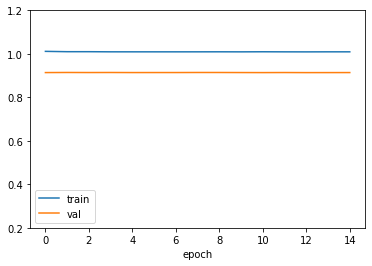

In [ ]:
plt.plot(h1.history['loss'])
plt.plot(h1.history['val_loss'])
plt.ylim(0.2,1.2)
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower left')
plt.show()

###TASK 1.2

In [ ]:
task2_dt=pd.read_csv('/content/Electric_Production.csv',)

task2_dt.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [ ]:
task2_dt.dtypes

DATE           object
IPG2211A2N    float64
dtype: object

In [ ]:
prev_data_count=6

new_task2_data = new_feature_dataset(task2_dt['IPG2211A2N'],prev_data_count)

In [ ]:
col_names=['feature_'+str(i+1) for i in range(0,prev_data_count)]
col_names.append('Target')
print(col_names)

['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'Target']


In [ ]:
new_task2_data=pd.DataFrame(new_task2_data,columns=col_names)
new_task2_data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,Target
0,72.5052,70.6720,62.4502,57.4714,55.3151,58.0904,62.6202
1,70.6720,62.4502,57.4714,55.3151,58.0904,62.6202,63.2485
2,62.4502,57.4714,55.3151,58.0904,62.6202,63.2485,60.5846
3,57.4714,55.3151,58.0904,62.6202,63.2485,60.5846,56.3154
4,55.3151,58.0904,62.6202,63.2485,60.5846,56.3154,58.0005


In [ ]:
X = new_task2_data.drop('Target',axis=1)
y = new_task2_data['Target']


####Splitting the data in 80:20 ratio for training and testing of the model.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

####Normalizing data

In [ ]:
X_train=(X_train-X_train.mean())/X_train.std()
X_test = (X_test-X_train.mean())/X_train.std()



####LSTM

In [ ]:
inp = Input(shape=[None,1])
x = Conv1D(filters=64, kernel_size=5,strides=1, padding="causal",activation="relu")(inp)
x = LSTM(64, return_sequences=True)(x)
x = LSTM(32, return_sequences=True)(x)
x = Dense(40, activation="relu")(x)
x = Dense(10, activation="relu")(x)
out = Dense(1, activation='linear')(x)

model2 = Model(inputs=inp,outputs=out)
model2.summary()

Model: "model_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_32 (InputLayer)       [(None, None, 1)]         0         
                                                                 
 conv1d_31 (Conv1D)          (None, None, 64)          384       
                                                                 
 lstm_46 (LSTM)              (None, None, 64)          33024     
                                                                 
 lstm_47 (LSTM)              (None, None, 32)          12416     
                                                                 
 dense_69 (Dense)            (None, None, 40)          1320      
                                                                 
 dense_70 (Dense)            (None, None, 10)          410       
                                                                 
 dense_71 (Dense)            (None, None, 1)           11 

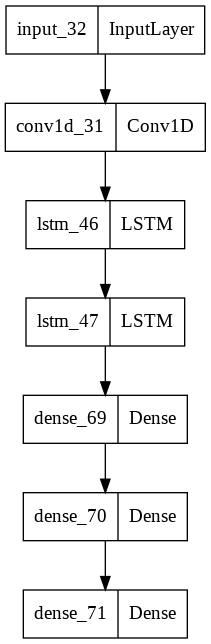

In [ ]:
plot_model(model2,'model1_lstm.png')

**Training**

In [ ]:
model2.compile(optimizer='adam',loss='mse')

In [ ]:
h2=model2.fit(X_train,y_train.values,epochs=30,validation_split=0.1)

Epoch 1/30
9/9 [==============================] - 6s 158ms/step - loss: 8185.9590 - val_loss: 7950.5132
Epoch 2/30
9/9 [==============================] - 0s 17ms/step - loss: 8144.4194 - val_loss: 7873.4219
Epoch 3/30
9/9 [==============================] - 0s 14ms/step - loss: 8013.0171 - val_loss: 7631.0044
Epoch 4/30
9/9 [==============================] - 0s 16ms/step - loss: 7661.1016 - val_loss: 7144.8120
Epoch 5/30
9/9 [==============================] - 0s 16ms/step - loss: 7098.3267 - val_loss: 6517.5410
Epoch 6/30
9/9 [==============================] - 0s 15ms/step - loss: 6429.6816 - val_loss: 5817.9351
Epoch 7/30
9/9 [==============================] - 0s 15ms/step - loss: 5680.3730 - val_loss: 5046.6270
Epoch 8/30
9/9 [==============================] - 0s 14ms/step - loss: 4873.4458 - val_loss: 4240.3159
Epoch 9/30
9/9 [==============================] - 0s 15ms/step - loss: 4043.9148 - val_loss: 3431.7217
Epoch 10/30
9/9 [==============================] - 0s 17ms/step - loss: 

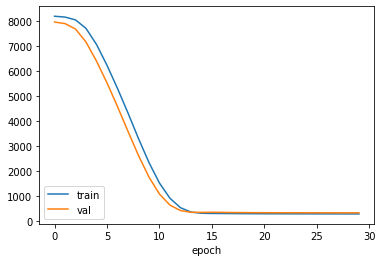

In [ ]:
plt.plot(h2.history['loss'])
plt.plot(h2.history['val_loss'])

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower left')
plt.show()

####GRU

In [ ]:
inp = Input(shape=[None,1])
x = Conv1D(filters=32, kernel_size=5,strides=1, padding="causal",activation="relu")(inp)
x = GRU(64, return_sequences=True)(x)
x = GRU(64, return_sequences=True)(x)
x = Dense(40, activation="relu")(x)
out = Dense(1, activation='linear')(x)

model2 = Model(inputs=inp,outputs=out)
model2.summary()

Model: "model_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_29 (InputLayer)       [(None, None, 1)]         0         
                                                                 
 conv1d_28 (Conv1D)          (None, None, 32)          192       
                                                                 
 gru_12 (GRU)                (None, None, 64)          18816     
                                                                 
 gru_13 (GRU)                (None, None, 64)          24960     
                                                                 
 dense_61 (Dense)            (None, None, 40)          2600      
                                                                 
 dense_62 (Dense)            (None, None, 1)           41        
                                                                 
Total params: 46,609
Trainable params: 46,609
Non-trainabl

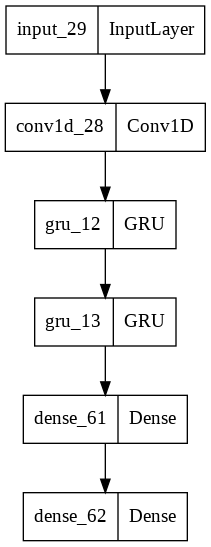

In [ ]:
plot_model(model2,'model2_gru.png')

**Training**

In [ ]:
model2.compile(optimizer='adam',loss='mse')

In [ ]:
h4=model2.fit(X_train,y_train.values,epochs=25,validation_split=0.1)

Epoch 1/25
9/9 [==============================] - 6s 129ms/step - loss: 8156.9043 - val_loss: 7878.0737
Epoch 2/25
9/9 [==============================] - 0s 14ms/step - loss: 8003.5195 - val_loss: 7585.0903
Epoch 3/25
9/9 [==============================] - 0s 14ms/step - loss: 7507.0864 - val_loss: 6768.1362
Epoch 4/25
9/9 [==============================] - 0s 16ms/step - loss: 6581.0049 - val_loss: 5883.8188
Epoch 5/25
9/9 [==============================] - 0s 16ms/step - loss: 5747.3545 - val_loss: 5133.3931
Epoch 6/25
9/9 [==============================] - 0s 15ms/step - loss: 5006.7476 - val_loss: 4424.7368
Epoch 7/25
9/9 [==============================] - 0s 15ms/step - loss: 4292.0063 - val_loss: 3748.1533
Epoch 8/25
9/9 [==============================] - 0s 15ms/step - loss: 3609.6731 - val_loss: 3102.7791
Epoch 9/25
9/9 [==============================] - 0s 15ms/step - loss: 2968.9045 - val_loss: 2495.9856
Epoch 10/25
9/9 [==============================] - 0s 15ms/step - loss: 

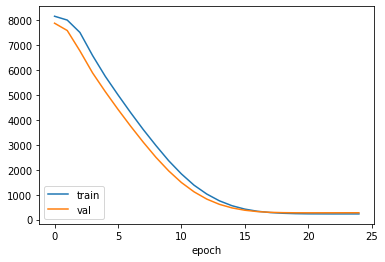

In [ ]:
plt.plot(h4.history['loss'])
plt.plot(h4.history['val_loss'])

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower left')
plt.show()


##TASK 2




###TASK 2.1

In [47]:
data3 = pd.read_csv('/content/IMDB Dataset.csv')
data3.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [48]:
!pip install nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:
english_stops = set(stopwords.words('english'))

In [50]:
def preprocess(text):
  s=''
  text = re.sub(r'[0-9]',"",text)
  text = re.sub(r'[^\w\s]',"",text)
  if text not in english_stops:
    text = text.lower()
    text = text.split()
    return text
  else:
    return s

In [51]:
data3['review'] = data3['review'].fillna("")
data3['review'] = data3['review'].map(lambda x: preprocess(x))


In [54]:
def labels(i):
    if i=='positive':
        return 1
    else:
        return 0
data3['sentiment'] = data3['sentiment'].map(lambda x:labels(x))
data3.head()

,review,sentiment
0,"[one, of, the, other, reviewers, has, mentione...",1
1,"[a, wonderful, little, production, br, br, the...",1
2,"[i, thought, this, was, a, wonderful, way, to,...",1
3,"[basically, theres, a, family, where, a, littl...",0
4,"[petter, matteis, love, in, the, time, of, mon...",1


**Train-Test Split**

In [55]:
x_train,x_test,y_train,y_test = train_test_split(data3['review'],data3['sentiment'],test_size=0.2,random_state=4)

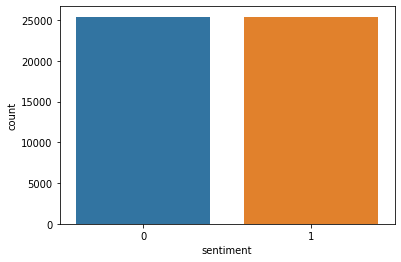

In [61]:
import seaborn as sns
sns.countplot(x='sentiment',data=data3)
plt.show()

In [58]:
from tensorflow.keras.preprocessing.text import Tokenizer  
from tensorflow.keras.preprocessing.sequence import pad_sequences
import statistics

review_length = []
for review in x_train:
  review_length.append(len(review))

max_length = round(statistics.mean(review_length))

token = Tokenizer()   
token.fit_on_texts(x_train)
x_train = token.texts_to_sequences(x_train)
x_test = token.texts_to_sequences(x_test)



In [59]:
#apply padding on the number sequences to bring all of then same length
x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

#vocbulary or list of words found adding 1 for 0 padding
total_words = len(token.word_index) + 1   
max_length

229

####LSTM

In [69]:
model = Sequential()
model.add(Embedding(total_words,32 , input_length = max_length))
model.add(LSTM(50))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 229, 32)           4982048   
                                                                 
 lstm_5 (LSTM)               (None, 50)                16600     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 4,998,699
Trainable params: 4,998,699
Non-trainable params: 0
_________________________________________________________________
None


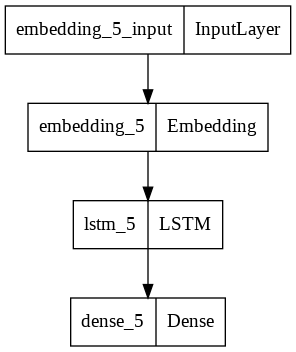

In [70]:
plot_model(model,'lstm_sentiment.png')

**Training**

In [71]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [74]:
h1=model.fit(x_train,y_train,epochs=10,validation_split=0.1)

Epoch 1/10
1143/1143 [==============================] - 59s 52ms/step - loss: 0.1020 - accuracy: 0.9678 - val_loss: 0.4130 - val_accuracy: 0.8661
Epoch 2/10
1143/1143 [==============================] - 59s 52ms/step - loss: 0.2888 - accuracy: 0.8790 - val_loss: 0.4891 - val_accuracy: 0.8323
Epoch 3/10
1143/1143 [==============================] - 58s 51ms/step - loss: 0.2847 - accuracy: 0.8889 - val_loss: 0.5064 - val_accuracy: 0.8476
Epoch 4/10
1143/1143 [==============================] - 58s 51ms/step - loss: 0.1093 - accuracy: 0.9665 - val_loss: 0.4719 - val_accuracy: 0.8580
Epoch 5/10
1143/1143 [==============================] - 59s 51ms/step - loss: 0.0801 - accuracy: 0.9781 - val_loss: 0.4588 - val_accuracy: 0.8550
Epoch 6/10
1143/1143 [==============================] - 59s 52ms/step - loss: 0.0544 - accuracy: 0.9855 - val_loss: 0.5151 - val_accuracy: 0.8644
Epoch 7/10
1143/1143 [==============================] - 60s 52ms/step - loss: 0.0352 - accuracy: 0.9919 - val_loss: 0.5799 -

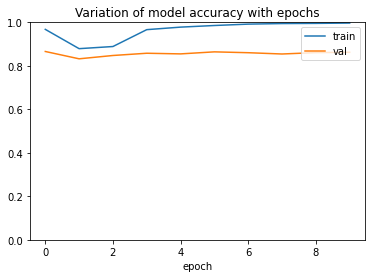

In [79]:
plt.plot(h1.history['accuracy'])
plt.plot(h1.history['val_accuracy'])
plt.title('Variation of model accuracy with epochs')
plt.xlabel('epoch')
plt.ylim(0,1)
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [80]:
pred = model.predict(x_test)
bi_op=[]
#output here if greater than 0.5 implies +ve else -ve
for i in pred:
  if(i>0.5):
    bi_op.append(1)
  else:
    bi_op.append(0)



In [81]:
from sklearn.metrics import classification_report

print(classification_report(y_test,bi_op,target_names=['Positive','Negative']))

              precision    recall  f1-score   support

    Positive       0.85      0.88      0.86      5073
    Negative       0.88      0.84      0.86      5082

    accuracy                           0.86     10155
   macro avg       0.86      0.86      0.86     10155
weighted avg       0.86      0.86      0.86     10155



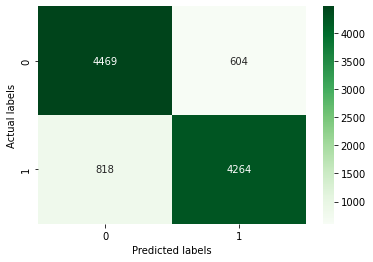

In [92]:

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,bi_op)
sns.heatmap(cm,annot=True,cmap='Greens',fmt='.4g')
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()


###TASK 2.2

####GRU

In [98]:
model2 = Sequential()
model2.add(Embedding(total_words, 64, input_length=max_length))
model2.add(GRU(32))
model2.add(Dense(1, activation='sigmoid'))
print(model2.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 229, 64)           9964096   
                                                                 
 gru_1 (GRU)                 (None, 32)                9408      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 9,973,537
Trainable params: 9,973,537
Non-trainable params: 0
_________________________________________________________________
None


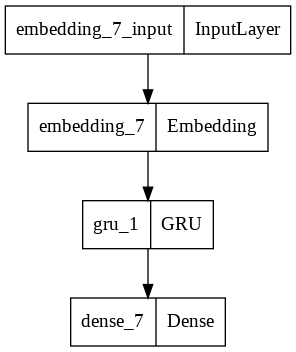

In [107]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
plot_model(model2,'gru2.png')

In [109]:
h2=model2.fit(x_train,y_train,epochs=12,validation_split=0.1)

Epoch 1/12
1143/1143 [==============================] - 51s 45ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.9265 - val_accuracy: 0.8474
Epoch 2/12
1143/1143 [==============================] - 50s 44ms/step - loss: 4.7539e-04 - accuracy: 0.9999 - val_loss: 0.9142 - val_accuracy: 0.8262
Epoch 3/12
1143/1143 [==============================] - 49s 43ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.9570 - val_accuracy: 0.8419
Epoch 4/12
1143/1143 [==============================] - 48s 42ms/step - loss: 1.4116e-04 - accuracy: 1.0000 - val_loss: 1.0710 - val_accuracy: 0.8432
Epoch 5/12
1143/1143 [==============================] - 48s 42ms/step - loss: 3.8871e-05 - accuracy: 1.0000 - val_loss: 1.2432 - val_accuracy: 0.8454
Epoch 6/12
1143/1143 [==============================] - 49s 43ms/step - loss: 7.6416e-06 - accuracy: 1.0000 - val_loss: 1.3231 - val_accuracy: 0.8476
Epoch 7/12
1143/1143 [==============================] - 49s 43ms/step - loss: 4.1275e-06 - accuracy: 1.0000 

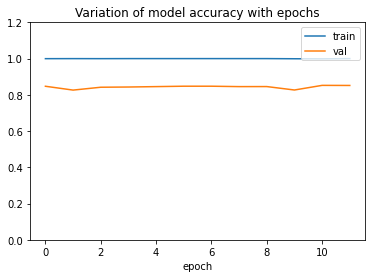

In [112]:
plt.plot(h2.history['accuracy'])
plt.plot(h2.history['val_accuracy'])
plt.title('Variation of model accuracy with epochs')
plt.xlabel('epoch')
plt.ylim(0,1.2)
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [113]:
gru_pred = model2.predict(x_test)
bi_op_gru=[]
#output here if greater than 0.5 implies +ve else -ve
for i in pred:
  if(i>0.5):
    bi_op_gru.append(1)
  else:
    bi_op_gru.append(0)


              precision    recall  f1-score   support

    Positive       0.85      0.88      0.86      5073
    Negative       0.88      0.84      0.86      5082

    accuracy                           0.86     10155
   macro avg       0.86      0.86      0.86     10155
weighted avg       0.86      0.86      0.86     10155



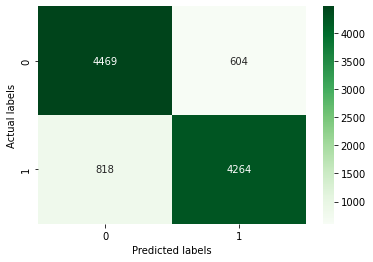

In [114]:
print(classification_report(y_test,bi_op_gru,target_names=['Positive','Negative']))
cm=confusion_matrix(y_test,bi_op_gru)
sns.heatmap(cm,annot=True,cmap='Greens',fmt='.4g')
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()